In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pystan
import pymc3 as pm
from theano import tensor as tt

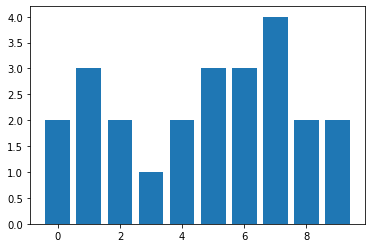

In [97]:
c = [1 + np.random.poisson(1) for i in range(10)]

plt.bar([i for i in range(len(c))], c)
plt.show()

In [98]:
k = 500

C = c
C.extend([0 for i in range(k - len(c))])

def stick_breaking(beta):
    portion_remaining = tt.concatenate([[1], tt.extra_ops.cumprod(1 - beta)[:-1]])

    return beta * portion_remaining

with pm.Model() as model:
    
    alpha = pm.HalfCauchy('alpha', 10)
    beta = pm.Beta('beta', 2, alpha, shape=k)
    
    pi = pm.Deterministic('pi', stick_breaking(beta))
    
    obs = pm.Multinomial('obs', n=sum(C), p=pi, observed=C)

In [124]:
with model:
    trace = pm.sample(draws=5000, n_init=1000, cores=1, chains=1)

INFO:pymc3:Auto-assigning NUTS sampler...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Sequential sampling (1 chains in 1 job)
INFO:pymc3:NUTS: [beta, alpha]
100%|██████████████████████████████████████████████████████████████████████████████| 5500/5500 [02:30<00:00, 36.66it/s]
INFO:pymc3:Only one chain was sampled, this makes it impossible to run some convergence checks


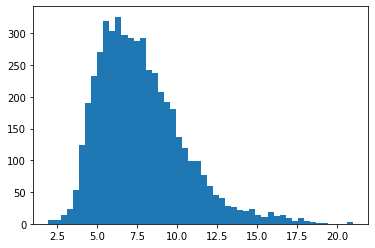

In [125]:
plt.hist(trace['alpha'], bins=50)
plt.show()

C:\Users\carte\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


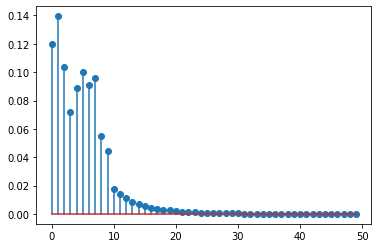

In [126]:
pi = trace['pi'].mean(axis=0)
plt.stem(pi[:50])
plt.show()

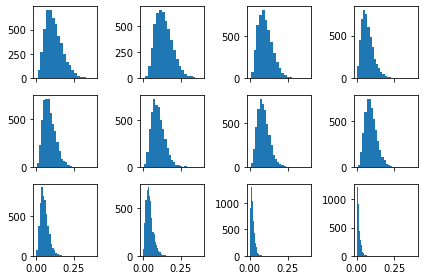

In [135]:
fig, ax = plt.subplots(3, 4, sharex=True)
ax = ax.reshape(-1)

for i in range(12):
    pi = trace['pi'][:,i]
    ax[i].hist(pi, bins=20)
    
plt.tight_layout()
plt.show()